# Deep Contextual Bandits Testing Script

In [2]:
import numpy as np
import pandas as pd
from random import random
import matplotlib.pyplot as plt
##Generate Data

def get_customer(ctype=None):
    """Customers come from two feature distributions.
    Class 1: mean age 25, var 5 years, min age 18
             mean ARPU 100, var 15
    Class 2: mean age 45, var 6 years
             mean ARPU 50, var 25
    """
    if ctype is None:
        if random() > .5: #coin toss
            ctype = 1
        else:
            ctype = 2
    age = 0
    if ctype == 1:
        while age < 18:
            age = np.random.normal(25, 5)
            ft = np.random.normal(100, 15)
    if ctype == 2:
        while age < 18:
            age = np.random.normal(45, 6)
            ft = np.random.normal(50, 25)
    age = round(age)
    return ctype, (age, ft)

def get_rewards(customer):
    """
    There are three actions:
    promo 1: low value. 10 dollar if accept
    promo 2: mid value. 25 dollar if accept
    promo 3: high value. 100 dollar if accept
    
    Both groups are unlikely to accept promo 2.
    Group 1 is more likely to accept promo 1.
    Group 2 is slightly more likely to accept promo 3.
    
    The optimal choice for group 1 is promo 1; 90% acceptance for
    an expected reward of 9 dollars each.
    Group 2 accepts with 25% rate for expected 2.5 dollar reward
    
    The optimal choice for group 2 is promo 3; 20% acceptance for an expected
    reward of 20 dollars each.
    Group 1 accepts with 2% for expected reward of 2 dollars.
    
    The least optimal choice in all cases is promo 2; 10% acceptance rate for both groups
    for an expected reward of 2.5 dollars.
    """
    if customer[0] == 1: #group 1 customer
        if random() > .1:
            reward1 = 10
        else:
            reward1 = 0
        if random() > .90:
            reward2 = 25
        else:
            reward2 = 0
        if random() > .98:
            reward3 = 100
        else:
            reward3 = 0
    if customer[0] == 2: #group 2 customer
        if random() > .75:
            reward1 = 10
        else:
            reward1 = 0
        if random() > .90:
            reward2 = 25
        else:
            reward2 = 0
        if random() > .80:
            reward3 = 100
        else:
            reward3 = 0
    return np.array([reward1, reward2, reward3])

def get_cust_reward():
    """returns a customer and reward vector"""
    cust = get_customer()
    reward = get_rewards(cust)
    age = cust[1]
    return np.array([age])/100, reward

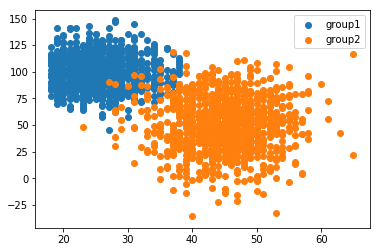

In [3]:
group1 = [get_customer(ctype=1)[1] for x in range(1000)]
group2 = [get_customer(ctype=2)[1] for x in range(1000)]
plt.scatter([x[0] for x in group1], [x[1] for x in group1], label='group1');
plt.scatter([x[0] for x in group2], [x[1] for x in group2], label='group2');
plt.legend()

In [4]:
customers = [get_customer(ctype=1) for x in range(100000)]
rewards = np.concatenate([np.expand_dims(get_rewards(cust), axis=0) for cust in customers])
print('group 1 expected rewards: (100000 samples)', rewards.mean(axis=0))

customers = [get_customer(ctype=2) for x in range(100000)]
rewards = np.concatenate([np.expand_dims(get_rewards(cust), axis=0) for cust in customers])
rewards.mean(axis=0)
print('group 2 expected rewards: (100000 samples)', rewards.mean(axis=0))

group 1 expected rewards: (100000 samples) [9.0017  2.54325 2.001  ]
group 2 expected rewards: (100000 samples) [ 2.5196  2.469  19.987 ]


total regret this round:  1980


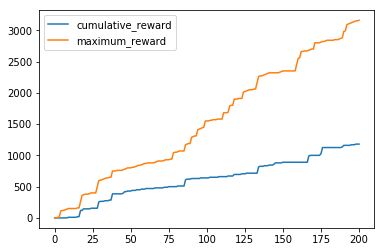

total regret this round:  845


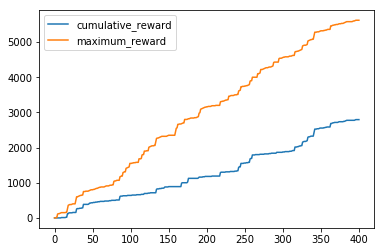

In [5]:
from space_bandits import init_linear_model

num_actions = 3
context_dim = 2

linear_model = init_linear_model(num_actions, context_dim, initial_pulls=100)

timesteps = []
c_reward = []
cumulative_reward = 0
m_reward = []
maximum_reward = 0
regret_record = []

for i in range(500):
    timesteps.append(i)
    cust = get_customer()
    reward_vec = get_rewards(cust)
    context = np.array([cust[1]])/100
    if cust[0] == 1:
        best_choice = 0
    elif cust[0] == 2:
        best_choice = 2
    else:
        raise Exception()
    mx = reward_vec[best_choice]
    maximum_reward += mx
    m_reward.append(maximum_reward)
    action = linear_model.action(context)
    reward = reward_vec[action]
    regret = mx - reward
    regret_record.append(regret)
    cumulative_reward += reward
    c_reward.append(cumulative_reward)
    linear_model.update(context, action, reward)
    if i % 200 == 0 and i > 0:
        print('total regret this round: ', sum(regret_record))
        regret_record = []
        plt.plot(timesteps, c_reward, label='cumulative_reward')
        plt.plot(timesteps, m_reward, label='maximum_reward')
        plt.legend()
        plt.show()

total regret this round:  380


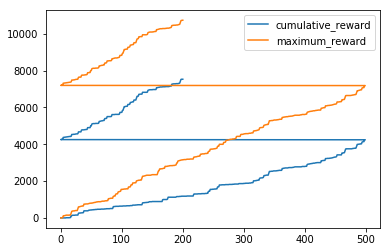

total regret this round:  220


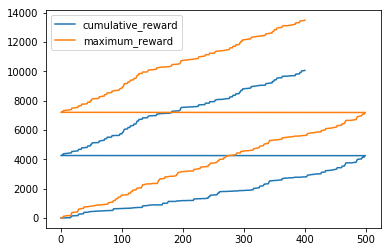

In [6]:
#test linear model saving/loading
from space_bandits import load_linear_model
linear_model.save('test_path.pkl')
linear_model = load_linear_model('test_path.pkl')

#continue training

timesteps = []
c_reward = []
cumulative_reward = 0
m_reward = []
maximum_reward = 0
regret_record = []

for i in range(500):
    timesteps.append(i)
    cust = get_customer()
    reward_vec = get_rewards(cust)
    context = np.array([cust[1]])/100
    if cust[0] == 1:
        best_choice = 0
    elif cust[0] == 2:
        best_choice = 2
    else:
        raise Exception()
    mx = reward_vec[best_choice]
    maximum_reward += mx
    m_reward.append(maximum_reward)
    action = linear_model.action(context)
    reward = reward_vec[action]
    regret = mx - reward
    regret_record.append(regret)
    cumulative_reward += reward
    c_reward.append(cumulative_reward)
    linear_model.update(context, action, reward)
    if i % 200 == 0 and i > 0:
        print('total regret this round: ', sum(regret_record))
        regret_record = []
        plt.plot(timesteps, c_reward, label='cumulative_reward')
        plt.plot(timesteps, m_reward, label='maximum_reward')
        plt.legend()
        plt.show()

Initializing model neural_model-bnn.
Training neural_model-bnn for 100 steps...
Training neural_model-bnn for 100 steps...
total regret this round:  800


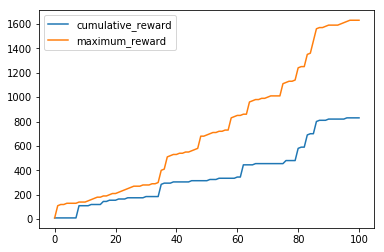

Training neural_model-bnn for 100 steps...
Training neural_model-bnn for 100 steps...
total regret this round:  1270


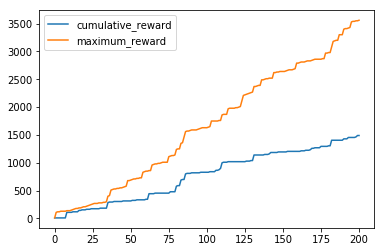

Training neural_model-bnn for 100 steps...
Training neural_model-bnn for 100 steps...
total regret this round:  950


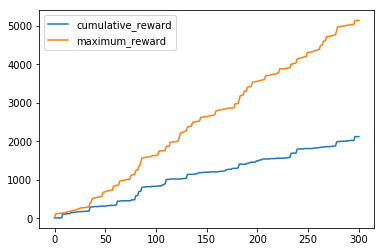

Training neural_model-bnn for 100 steps...
Training neural_model-bnn for 100 steps...
total regret this round:  140


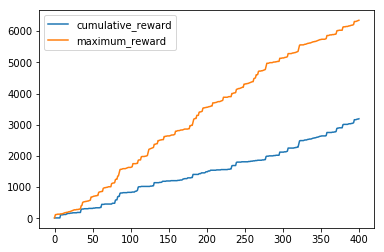

Training neural_model-bnn for 100 steps...
Training neural_model-bnn for 100 steps...
total regret this round:  220


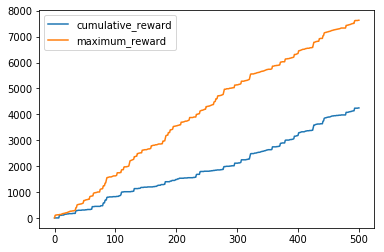

Training neural_model-bnn for 100 steps...
Training neural_model-bnn for 100 steps...
total regret this round:  140


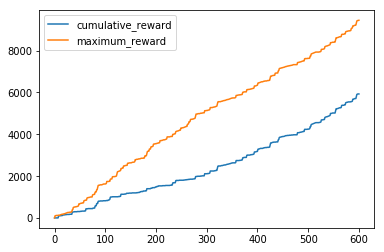

Training neural_model-bnn for 100 steps...
Training neural_model-bnn for 100 steps...
total regret this round:  60


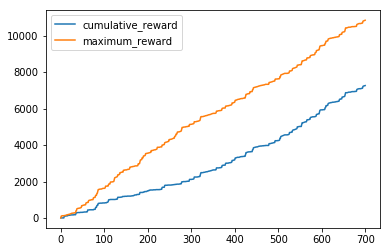

Training neural_model-bnn for 100 steps...
Training neural_model-bnn for 100 steps...
total regret this round:  40


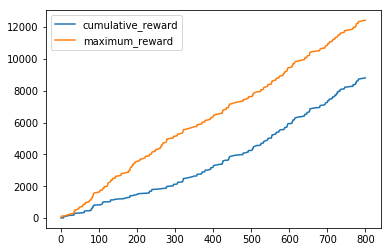

Training neural_model-bnn for 100 steps...
Training neural_model-bnn for 100 steps...
total regret this round:  50


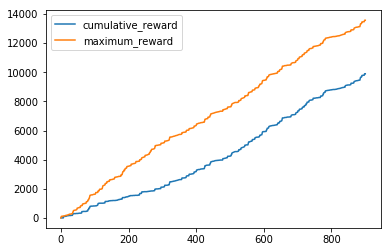

Training neural_model-bnn for 100 steps...
Training neural_model-bnn for 100 steps...


In [8]:
from space_bandits import init_neural_model

num_actions = 3
context_dim = 2

neural_model = init_neural_model(num_actions, context_dim, initial_pulls=100, memory_size=500)
assert neural_model.data_h.memory_size == 500

timesteps = []
c_reward = []
cumulative_reward = 0
m_reward = []
maximum_reward = 0
regret_record = []

for i in range(1000):
    timesteps.append(i)
    cust = get_customer()
    reward_vec = get_rewards(cust)
    context = np.array([cust[1]])/100
    if cust[0] == 1:
        best_choice = 0
    elif cust[0] == 2:
        best_choice = 2
    else:
        raise Exception()
    mx = reward_vec[best_choice]
    maximum_reward += mx
    m_reward.append(maximum_reward)
    action = neural_model.action(context)
    reward = reward_vec[action]
    regret = mx - reward
    regret_record.append(regret)
    cumulative_reward += reward
    c_reward.append(cumulative_reward)
    neural_model.update(context, action, reward)
    if i % 100 == 0 and i > 0:
        print('total regret this round: ', sum(regret_record))
        regret_record = []
        plt.plot(timesteps, c_reward, label='cumulative_reward')
        plt.plot(timesteps, m_reward, label='maximum_reward')
        plt.legend()
        plt.show()

In [10]:
neural_model.save('test_model')
from space_bandits import load_neural_model
neural_model = load_neural_model('test_model.zip')

Initializing model neural_model-bnn.
INFO:tensorflow:Restoring parameters from tmp/weights


Training neural_model-bnn for 100 steps...
Training neural_model-bnn for 100 steps...
total regret this round:  180


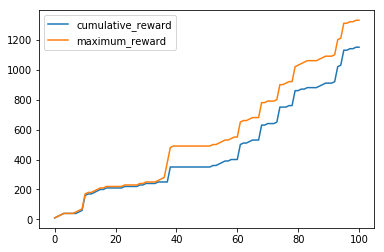

Training neural_model-bnn for 100 steps...
Training neural_model-bnn for 100 steps...
total regret this round:  150


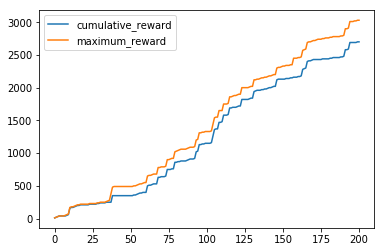

Training neural_model-bnn for 100 steps...
Training neural_model-bnn for 100 steps...
total regret this round:  260


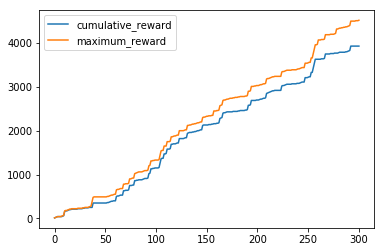

Training neural_model-bnn for 100 steps...
Training neural_model-bnn for 100 steps...
total regret this round:  140


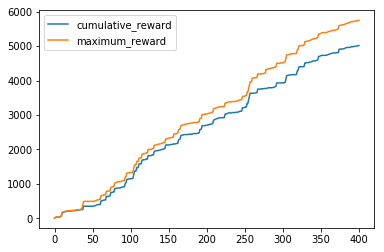

Training neural_model-bnn for 100 steps...
Training neural_model-bnn for 100 steps...


In [12]:
timesteps = []
c_reward = []
cumulative_reward = 0
m_reward = []
maximum_reward = 0
regret_record = []

for i in range(500):
    timesteps.append(i)
    cust = get_customer()
    reward_vec = get_rewards(cust)
    context = np.array([cust[1]])/100
    if cust[0] == 1:
        best_choice = 0
    elif cust[0] == 2:
        best_choice = 2
    else:
        raise Exception()
    mx = reward_vec[best_choice]
    maximum_reward += mx
    m_reward.append(maximum_reward)
    action = neural_model.action(context)
    reward = reward_vec[action]
    regret = mx - reward
    regret_record.append(regret)
    cumulative_reward += reward
    c_reward.append(cumulative_reward)
    neural_model.update(context, action, reward)
    if i % 100 == 0 and i > 0:
        print('total regret this round: ', sum(regret_record))
        regret_record = []
        plt.plot(timesteps, c_reward, label='cumulative_reward')
        plt.plot(timesteps, m_reward, label='maximum_reward')
        plt.legend()
        plt.show()

In [13]:
ARPUs = np.arange(-.25, 1.6, .01)
ages = np.arange(-.0, 1, .01)

colors = np.zeros((len(ARPUs), len(ages), 3))

for j, ARPU in enumerate(ARPUs):
    for i, age in enumerate(ages):
        color = linear_model.expected_values(np.array([age, ARPU]))
        colors[j, len(ages)-1-i, :] = color

In [14]:
def scale(distro):
    """Scales distribution between 0-255"""
    min_val = distro.min()
    max_val = distro.max()
    rng = max_val - min_val
    new_distro = ((distro - min_val) * 255 / rng) + 0
    return new_distro

def plot_decision_boundary(model, X, Y, h=1, title='decision boundary'):
    ftnames = X.columns[0], X.columns[1]
    X = X.values
    model.fit(X[:, :2], Y)
    x_min = X[:, 1].min() - .5
    x_max = X[:, 1].max() + .5
    y_min = X[:, 0].min() - .5
    y_max = X[:, 0].max() + .5
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, h),
        np.arange(y_min, y_max, h)
    )
    Z = model.predict(np.c_[yy.ravel(), xx.ravel()])

    # Put the result into a color plot.
    Z = Z.reshape(xx.shape)
    plt.pcolormesh(xx, yy, Z, alpha=.5)

    # Add the training points to the plot.
    plt.scatter(X[:, 1], X[:, 0], c=Y);
    plt.scatter(X[:, 1], X[:, 0], c='black', alpha=.1);


    plt.xlabel(ftnames[1])
    plt.ylabel(ftnames[0])

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max());
    plt.title(title)
    plt.show()

In [15]:
cp = colors.copy()
colors = cp.copy()
colors[:, :, 0] = scale(colors[:, :, 0])
colors[:, :, 1] = scale(colors[:, :, 1])
colors[:, :, 2] = scale(colors[:, :, 2])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


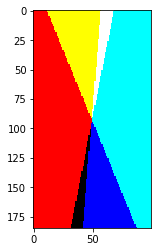

In [16]:
group1 = [get_customer(ctype=1)[1] for x in range(1000)]
group2 = [get_customer(ctype=2)[1] for x in range(1000)]
#plt.scatter([x[0] for x in group1], [x[1] for x in group1], label='group1');
#plt.scatter([x[0] for x in group2], [x[1] for x in group2], label='group2');

plt.imshow(colors.astype(np.int8))